/Users/nickscavuzzo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Mean Squared Error: 399.89256784800506


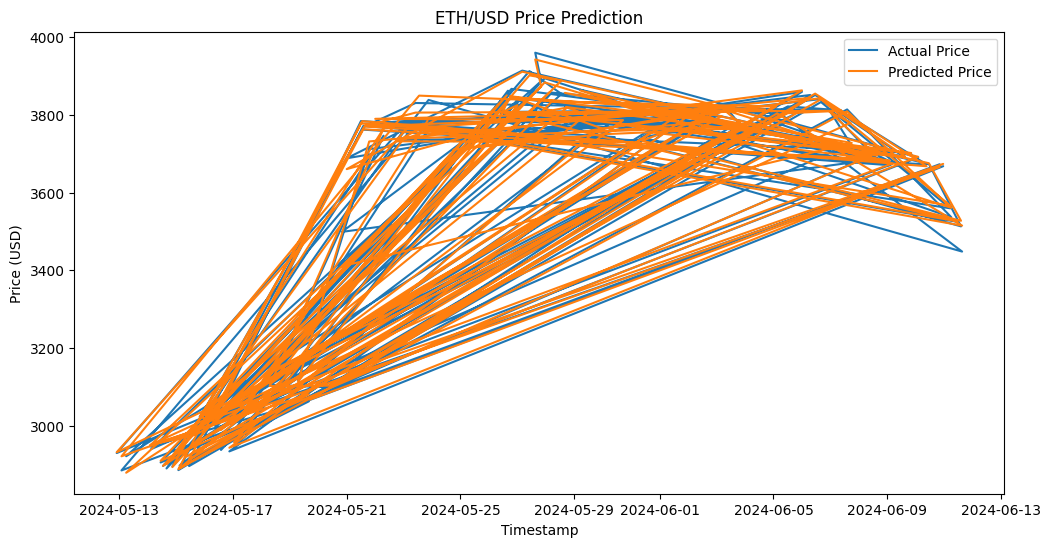

OSError: [Errno 30] Read-only file system: 'eth_usd_price_model.pkl'

In [1]:
# ETH/USD Price Prediction

## Introduction
# This notebook demonstrates the process of predicting the price of ETH/USD in the next hour using a simple ML model.

import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Collection
# Collect historical ETH/USD price data from a public API

def fetch_data(start, end, interval='hour'):
    url = f"https://api.coingecko.com/api/v3/coins/ethereum/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': start.timestamp(),
        'to': end.timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']
    return pd.DataFrame(prices, columns=['timestamp', 'price'])

end_date = datetime.now()
start_date = end_date - timedelta(days=30)
data = fetch_data(start_date, end_date)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.set_index('timestamp', inplace=True)

# Data Preprocessing
# Create features and labels

data['price_diff'] = data['price'].diff()
data['price_diff'].fillna(0, inplace=True)
data['target'] = data['price'].shift(-1)
data.dropna(inplace=True)

# Train-test split
features = ['price', 'price_diff']
X = data[features]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development
# Train a simple Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Evaluate the model on the test set

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.legend()
plt.title('ETH/USD Price Prediction')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.show()

# Model Export
# Export the model for use in an Allora node

import joblib
joblib.dump(model, 'eth_usd_price_model.pkl')

# Conclusion
# This notebook demonstrated a simple process of predicting ETH/USD prices using a Linear Regression model.